# Week 3

In addition to the below, remember you can always ask the Lab Helpers for suggestions at the alloted times.

## Level 1
### Use a nearest neighbour classifier on a dataset
Supply a random half of your data examples as trainnig data, and test on the remainder. Plot the value of the test error as you increase k from 1 to 15.

In [2]:
# import a dataset -  we will use one of the scikit built in datasets again
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()

We have imported the digits dataset, which is a simplified version of the very famous MNIST data set. This is a set of images, in black and white, of hand-drawn numbers from 0 to 9. Before proceeding, we will look at some of the data.

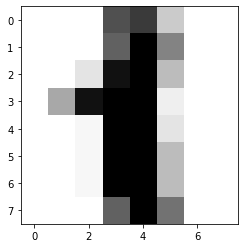

In [3]:
# get one image
image1 = digits.images[1]
plt.imshow(image1, cmap='Greys')


you should understand what the cmap parameter is doing here. If you do not, read the documentation for imshow (via a google search). The data in *images* is stored as a 2-d array, so that the rows and columns of the array match up with the physical coordinates of the image. The data in *data* is stored as a 1-d array, as shown below. You should compare both arrays to ensure you understand how the image data has been converted. From here, we will be working with *data*, as the sklearn functions take a 1-D array as input.

In [4]:
print(digits.images[1])
print(digits.data[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


Let's now apply the k-means classifier. Note that we have scaled the data. Why is this important, especially for a k-means classifier (which uses distances between features)? If you are struggling to answer this, the answer is in Week 4's video on *practical considerations in machine learning - part 1*

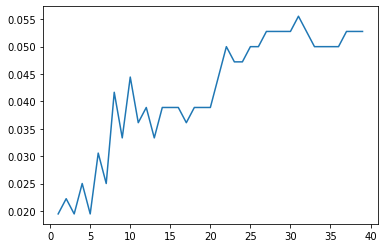

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

X_scaled = preprocessing.scale(digits.data)
# split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, test_size=0.2, random_state=41)
error_rate = []

for n in range(1,40):
    # TODO : train the k nearest neighbours classifier with different values for k
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # this line calculates the error rate, and then adds it on to the error_rate array
    error_rate.append(1 - accuracy_score(y_test,y_pred))
plt.plot(range(1,40), error_rate)

What happens to the error rate as K increases? Why do you think this occurs?

For problems with an even number of target classes, most people slsect an odd number for k. Try repeating this process for a problem that has only two classes (e.g. breast_cancer dataset). What do you notice about even numbered values of k? Why do you think this occurs?

## Repeat the target above, but over random train/test splits

Plot an average across random variation, including error bars for the standard error. What do you notice?

In the code below, we select 10 different random splits of train/test data. Note that the code is not particularly efficient, as we are training 10\*40 = 400 classifiers. It may take a couple of minutes to run.

<ErrorbarContainer object of 3 artists>

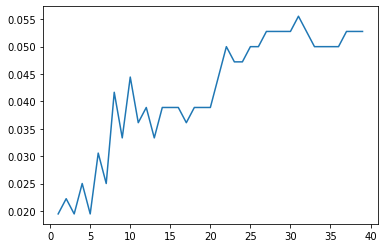

In [11]:
error_rate_a = np.empty([10, 39])
for i in range(0,10):
    for n_neighbors in range(1,40):
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, test_size=0.2, random_state=41)
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        error_rate_a[i,n_neighbors-1] = 1 - accuracy_score(y_test,y_pred)
        
#TODO: calculate the mean error for each of the ten runs
mean_error = np.mean(error_rate_a,axis=0)
err_bar = np.std(error_rate_a, axis = 0) * 1.96
plt.errorbar(range(1,40), mean_error, yerr = err_bar)

### Train and test a support vector machine on a dataset
For some variation, we are going to use a different data set to train and test an SVM. Note that standard SVM formulation is only designed to classify two classes. It *can* be extended to classify mutliple classes (and indeed, the SKlearn implentation does so), but the details of this are beyond the course scope.

We will use the breast cancer wisconsin dataset, in which the task is to classify whether a tumour is malignant (dangerous) or benign (safe) using features derived from images of a breast biopsy.

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
data = load_breast_cancer()
X = data.data;
y = data.target;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# You will learn next week that it is good practice to scale the data, using the mean
# and standard devation of the training set - we will skip this for now

# train a support vector machine classifier with an polynomial kernel of order 3
model = SVC(C=3)
# Todo - fit the model to training data
model.fit(X_train,y_train)

# calculate the model accuracy using .score()
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9239766081871345

### Vary the gamma parameter for the rbf svm and plot the error as you vary it between 0.01 and 10

For this particular data set, the optimum value of gamma is very close to zero, so we have varied gamma between 0.001 and 1, in steps of 0.01 instead.

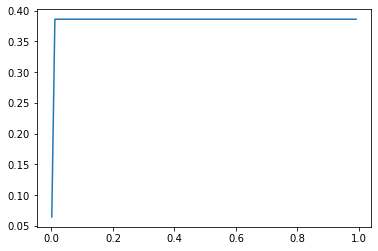

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### vary the gamma parameter for the rbf svm and plot the error as you vary it between 0.01 annd 10
error_rate = []
step_size = 0.01
max_gamma = 1
for i in np.arange(0.001, max_gamma, step_size):
    model = SVC(kernel = 'rbf', gamma = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test,y_pred))
    
plt.plot(np.arange(0.001, max_gamma, step_size), error_rate)

## Level 2

### try several different SVM parameters, plotting the testing error for each

Let us try using the the digits dataset again, so we can see how the sklearn implementation deals with multiclass (more than 2 classes) classification problems. This time, let's vary C, the regularisation parameter for the slack variables.

You will have to find a suitable range of values to plot for C.

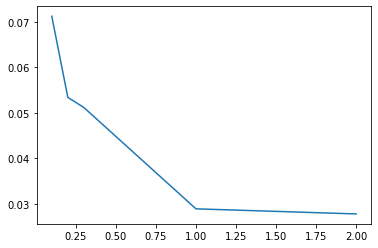

In [16]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC

digits = datasets.load_digits()
X_scaled = preprocessing.scale(digits.data)

# split the data into a training and test set

# create for loop that loops over different values of C, and store the model accuracy each time (hint: for this data set, start by searching 0<C<1)

# plot the model accuracies


X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, test_size = 0.5)
error_rate = []

C = [0.1,0.2,0.3,1,2]
for i in C:
#TODO
    model = SVC(C=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test,y_pred))
plt.plot(C, error_rate)



### Use the K-nn model and analyse how much time it takes to classify data points
User different numbers of features and different numbers of examples in the training data

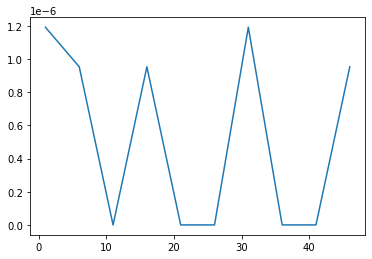

In [17]:
import time

# keep k fixed. Let's choose k=3
# change number of features - start with 5 features, and make our way up to the full 64 in increments of 5.
# record the time corresponding the number of features (and plot the result)

k=3
training_time = np.empty([10, 1])

for i in range(0,10):
        # Todo: change our dataset to have different numbers of features each time 
        # n.b. this is excluded from the time to train the classifier
        
        # todo: split the dataset into train/test sets
        
        start_time = time.time() #note the time at the start of classification
        
        # todo: train and test model.

        training_time[i] = time.time() - start_time

# plot the results
# technically, this shouldn't be a line plot, as k cannot take non-integer values
plt.plot(np.arange(1,51,5),training_time)